In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
planets = pd.read_excel("мдс/5/planets.xlsx")
planets


,planet_name,planet_diameter_km,planet_sun_distance_km
0,Mercury,4879,57900000
1,Venus,12104,108200000
2,Earth,12756,149600000
3,Mars,6792,227900000
4,Jupiter,142984,778600000
5,Saturn,120536,1433500000
6,Uranus,51118,2872500000
7,Neptune,49528,4495100000


In [69]:
moons = pd.read_excel("мдс/5/moons.xlsx")
moons


,planet_name,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3
0,Earth,Moon,384000,238850,3476,2160,31.10,1.000,1
1,Mars,Phobos,23460,14577,8,5,1.20,0.038,0.001
2,Mars,Deimos,9270,5760,20,12,7.40,0.240,0.057
3,Jupiter,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079
4,Jupiter,Europa,670900,416879,3126,1942,16.00,0.520,0.27
5,Jupiter,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3
6,Jupiter,Io,421600,261971,3629,2255,29.60,0.950,0.91
7,Saturn,Dione,377400,234506,1120,696,10.20,0.330,0.11
8,Saturn,Enceladus,238020,147899,498,309,7.20,0.230,0.054
9,Saturn,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%


Объединяем датафреймы


In [70]:
data = planets.merge(moons, how="inner",
                     left_on="planet_name", right_on="planet_name")
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%


In [71]:
data = data.assign(moon_volume_km3=(
    (data.moon_diameter_km/2)**3) * 4 * np.pi / 3)
data = data.assign(planet_volume_km3=(
    (data.planet_diameter_km/2)**3) * 4 * np.pi / 3)
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3,moon_volume_km3,planet_volume_km3
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1,2.199064e+10,1.086781e+12
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001,2.680826e+02,1.640558e+11
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057,4.188790e+03,1.640558e+11
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079,5.790584e+10,1.530597e+15
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27,1.599431e+10,1.530597e+15
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3,7.689763e+10,1.530597e+15
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91,2.502416e+10,1.530597e+15
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11,7.356186e+08,9.169570e+14
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054,6.466759e+07,9.169570e+14
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%,6.043993e+06,9.169570e+14


In [72]:
data = data.assign(relative_diameter=data.moon_diameter_km /
                   data.planet_diameter_km)
data = data.assign(relative_volume=data.moon_volume_km3 /
                   data.planet_volume_km3)
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3,moon_volume_km3,planet_volume_km3,relative_diameter,relative_volume
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1,2.199064e+10,1.086781e+12,0.272499,2.023465e-02
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001,2.680826e+02,1.640558e+11,0.001178,1.634094e-09
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057,4.188790e+03,1.640558e+11,0.002945,2.553271e-08
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079,5.790584e+10,1.530597e+15,0.033570,3.783218e-05
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27,1.599431e+10,1.530597e+15,0.021863,1.044972e-05
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3,7.689763e+10,1.530597e+15,0.036899,5.024028e-05
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91,2.502416e+10,1.530597e+15,0.025380,1.634928e-05
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11,7.356186e+08,9.169570e+14,0.009292,8.022389e-07
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054,6.466759e+07,9.169570e+14,0.004132,7.052412e-08
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%,6.043993e+06,9.169570e+14,0.001875,6.591359e-09


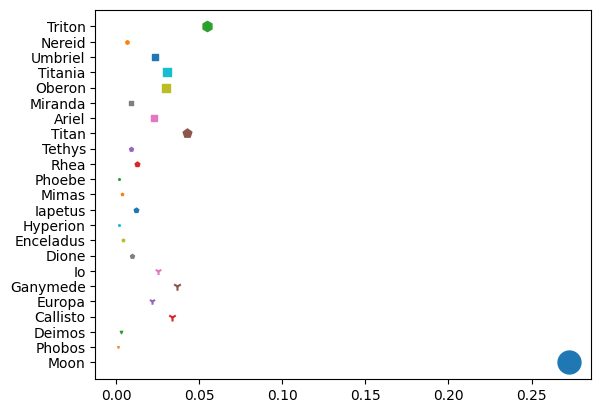

In [73]:
x = data["relative_diameter"]
y = data["moon_name"]
temp = list(x)
temp = np.asarray(temp)
sizes = temp*1000
fig, ax = plt.subplots()
markers = ["o", "v", "v", "1", "1", "1", "1", "p", "p", "p", "p",
           "p", "p", "p", "p", "p", "s", "s", "s", "s", "s", "h", "h"]

for xp, yp, m, sz in zip(x, y, markers, sizes):
    plt.scatter(xp, yp, marker=m, s=sz)


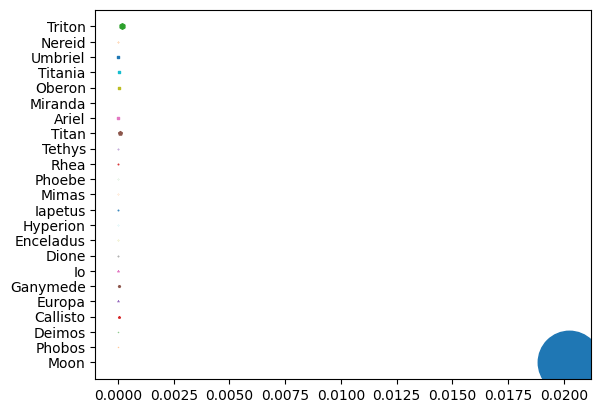

In [74]:
x = data["relative_volume"]
y = data["moon_name"]
temp = list(x)
temp = np.asarray(temp)
sizes = temp*100000
fig, ax = plt.subplots()
markers = ["o", "v", "v", "1", "1", "1", "1", "p", "p", "p", "p",
           "p", "p", "p", "p", "p", "s", "s", "s", "s", "s", "h", "h"]

for xp, yp, m, sz in zip(x, y, markers, sizes):
    plt.scatter(xp, yp, marker=m, s=sz)


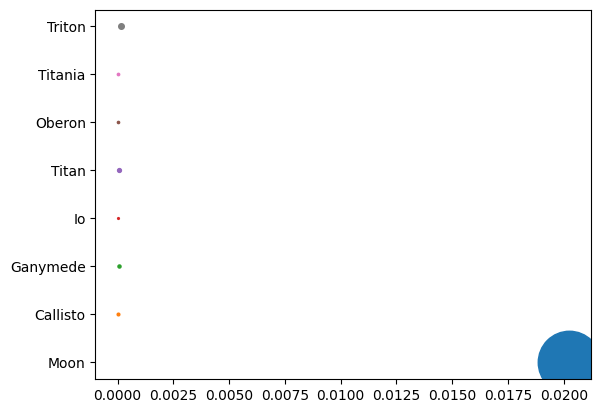

In [75]:
sorted = data.loc[data['relative_diameter'] > 0.025]
x = sorted["relative_volume"]
y = sorted["moon_name"]
temp = list(x)
temp = np.asarray(temp)
sizes = temp*100000
fig, ax = plt.subplots()
# markers=["o", "v", "v", "1", "1", "1", "1", "p", "p", "p", "p", "p", "p", "p", "p", "p", "s", "s", "s", "s", "s", "h", "h"]

for xp, yp, sz in zip(x, y, sizes):
    plt.scatter(xp, yp, s=sz)


In [76]:
data = data.assign(moon_angular_diameter_arcses=206265 *
                   data.moon_diameter_km / data.moon_planet_distance_km)
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3,moon_volume_km3,planet_volume_km3,relative_diameter,relative_volume,moon_angular_diameter_arcses
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1,2.199064e+10,1.086781e+12,0.272499,2.023465e-02,1867.127969
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001,2.680826e+02,1.640558e+11,0.001178,1.634094e-09,70.337596
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057,4.188790e+03,1.640558e+11,0.002945,2.553271e-08,445.016181
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079,5.790584e+10,1.530597e+15,0.033570,3.783218e-05,525.795008
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27,1.599431e+10,1.530597e+15,0.021863,1.044972e-05,961.073767
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3,7.689763e+10,1.530597e+15,0.036899,5.024028e-05,1017.059944
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91,2.502416e+10,1.530597e+15,0.025380,1.634928e-05,1775.464148
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11,7.356186e+08,9.169570e+14,0.009292,8.022389e-07,612.127186
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054,6.466759e+07,9.169570e+14,0.004132,7.052412e-08,431.560247
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%,6.043993e+06,9.169570e+14,0.001875,6.591359e-09,31.475955


In [77]:
sun_diameter = 1392700
data = data.assign(sun_angular_diameter_arcses=206265 *
                   sun_diameter / data.planet_sun_distance_km)
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3,moon_volume_km3,planet_volume_km3,relative_diameter,relative_volume,moon_angular_diameter_arcses,sun_angular_diameter_arcses
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1,2.199064e+10,1.086781e+12,0.272499,2.023465e-02,1867.127969,1920.222363
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001,2.680826e+02,1.640558e+11,0.001178,1.634094e-09,70.337596,1260.488221
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057,4.188790e+03,1.640558e+11,0.002945,2.553271e-08,445.016181,1260.488221
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079,5.790584e+10,1.530597e+15,0.033570,3.783218e-05,525.795008,368.951022
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27,1.599431e+10,1.530597e+15,0.021863,1.044972e-05,961.073767,368.951022
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3,7.689763e+10,1.530597e+15,0.036899,5.024028e-05,1017.059944,368.951022
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91,2.502416e+10,1.530597e+15,0.025380,1.634928e-05,1775.464148,368.951022
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11,7.356186e+08,9.169570e+14,0.009292,8.022389e-07,612.127186,200.394325
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054,6.466759e+07,9.169570e+14,0.004132,7.052412e-08,431.560247,200.394325
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%,6.043993e+06,9.169570e+14,0.001875,6.591359e-09,31.475955,200.394325


In [78]:
data = data.assign(relative_diameter_arcses=data.moon_angular_diameter_arcses /
                   data.sun_angular_diameter_arcses)
data


,planet_name,planet_diameter_km,planet_sun_distance_km,moon_name,moon_planet_distance_km,Distance from\nPlanet (mi),moon_diameter_km,Diameter (mi),Apparent Size in\nSky (arc min)1,Relative Diameter2,Relative Area3,moon_volume_km3,planet_volume_km3,relative_diameter,relative_volume,moon_angular_diameter_arcses,sun_angular_diameter_arcses,relative_diameter_arcses
0,Earth,12756,149600000,Moon,384000,238850,3476,2160,31.10,1.000,1,2.199064e+10,1.086781e+12,0.272499,2.023465e-02,1867.127969,1920.222363,0.972350
1,Mars,6792,227900000,Phobos,23460,14577,8,5,1.20,0.038,0.001,2.680826e+02,1.640558e+11,0.001178,1.634094e-09,70.337596,1260.488221,0.055802
2,Mars,6792,227900000,Deimos,9270,5760,20,12,7.40,0.240,0.057,4.188790e+03,1.640558e+11,0.002945,2.553271e-08,445.016181,1260.488221,0.353051
3,Jupiter,142984,778600000,Callisto,1883000,1170045,4800,2983,8.80,0.280,0.079,5.790584e+10,1.530597e+15,0.033570,3.783218e-05,525.795008,368.951022,1.425108
4,Jupiter,142984,778600000,Europa,670900,416879,3126,1942,16.00,0.520,0.27,1.599431e+10,1.530597e+15,0.021863,1.044972e-05,961.073767,368.951022,2.604882
5,Jupiter,142984,778600000,Ganymede,1070000,664869,5276,3278,17.00,0.550,0.3,7.689763e+10,1.530597e+15,0.036899,5.024028e-05,1017.059944,368.951022,2.756626
6,Jupiter,142984,778600000,Io,421600,261971,3629,2255,29.60,0.950,0.91,2.502416e+10,1.530597e+15,0.025380,1.634928e-05,1775.464148,368.951022,4.812195
7,Saturn,120536,1433500000,Dione,377400,234506,1120,696,10.20,0.330,0.11,7.356186e+08,9.169570e+14,0.009292,8.022389e-07,612.127186,200.394325,3.054613
8,Saturn,120536,1433500000,Enceladus,238020,147899,498,309,7.20,0.230,0.054,6.466759e+07,9.169570e+14,0.004132,7.052412e-08,431.560247,200.394325,2.153555
9,Saturn,120536,1433500000,Hyperion,1481000,920253,226,140,0.52,0.017,<0.1%,6.043993e+06,9.169570e+14,0.001875,6.591359e-09,31.475955,200.394325,0.157070


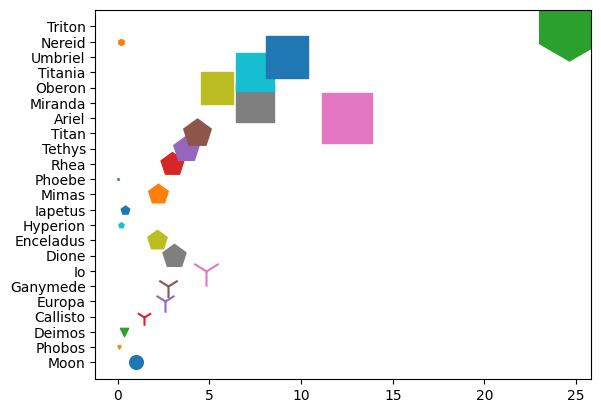

In [79]:
x = data["relative_diameter_arcses"]
y = data["moon_name"]
temp = list(x)
temp = np.asarray(temp)
sizes = temp*100
fig, ax = plt.subplots()
markers = ["o", "v", "v", "1", "1", "1", "1", "p", "p", "p", "p",
           "p", "p", "p", "p", "p", "s", "s", "s", "s", "s", "h", "h"]

for xp, yp, m, sz in zip(x, y, markers, sizes):
    plt.scatter(xp, yp, marker=m, s=sz)
